In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from DLC_for_WBFM.utils.projects.finished_project_data import ProjectData
from sklearn.experimental import enable_iterative_imputer
import napari
from sklearn.impute import IterativeImputer
import numpy as np


Bad key "text.kerning_factor" on line 4 in
/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
fname = "/scratch/zimmer/Charles/dlc_stacks/immobilized-2021_10_25/project_config.yaml"
project_data = ProjectData.load_final_project_data_from_config(fname)

Project data for directory:
/scratch/zimmer/Charles/dlc_stacks/immobilized-2021_10_25 
Found the following raw data files:
red_data: True
green_data: True
============Segmentation===============
raw_segmentation: True
segmentation: True
============Tracklets==================
df_training_tracklets: True
reindexed_masks_training: True
============Traces=====================
red_traces: True
green_traces: True
final_tracks: True
behavior_annotations: False



# Plot position of neuron with gaps

In [3]:
name = 'neuron_073'

/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotl

Text(0.5, 1.0, 'x-y position')

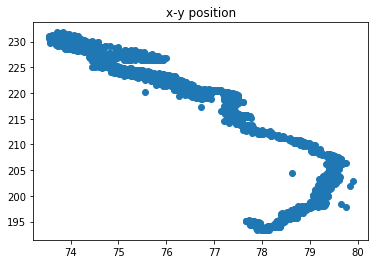

In [4]:
track = project_data.final_tracks[name]
track.replace(0.0, np.nan, inplace=True)
x, y = track['x'], track['y']

%matplotlib inline
plt.plot(x, y, 'o')
plt.title("x-y position")

Text(0.5, 1.0, 'z')

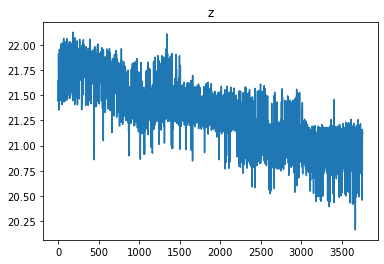

In [5]:
z = track['z']

%matplotlib inline
plt.plot(z)
plt.title("z")

# Impute the location of this neuron for the gaps using RANSAC

In [11]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.linear_model import RANSACRegressor
from sklearn.impute import IterativeImputer
from DLC_for_WBFM.utils.postprocessing.postprocessing_utils import filter_dataframe_using_likelihood
from DLC_for_WBFM.utils.postprocessing.utils_imputation import scale_impute_descale, df_of_only_locations, remove_all_nan_columns, replace_all_nan_columns

In [12]:
df_raw = project_data.final_tracks
df_with_likelihood = df_raw.copy()

likelihood_thresh = 0.5
df_filter = filter_dataframe_using_likelihood(df_with_likelihood, likelihood_thresh)

df_only_locations, old2new_names = df_of_only_locations(df_filter)

  0%|          | 0/127 [00:00<?, ?it/s]

In [13]:
df_out = scale_impute_descale(df_only_locations, estimator=RANSACRegressor(residual_threshold=1e-2))

[IterativeImputer] Completing matrix with shape (4500, 363)
[IterativeImputer] Change: 14384.95045930145, scaled tolerance: 0.030241176721117646 
[IterativeImputer] Change: 19660.035722002067, scaled tolerance: 0.030241176721117646 
[IterativeImputer] Change: 6875.970223653792, scaled tolerance: 0.030241176721117646 
[IterativeImputer] Change: 5217.687697991371, scaled tolerance: 0.030241176721117646 
[IterativeImputer] Change: 4718.3538332146345, scaled tolerance: 0.030241176721117646 
[IterativeImputer] Change: 10624.122757029198, scaled tolerance: 0.030241176721117646 
[IterativeImputer] Change: 12771.122909541602, scaled tolerance: 0.030241176721117646 
[IterativeImputer] Change: 19063.807087071917, scaled tolerance: 0.030241176721117646 
[IterativeImputer] Change: 36332.655667878484, scaled tolerance: 0.030241176721117646 
[IterativeImputer] Change: 83295.80832379044, scaled tolerance: 0.030241176721117646 
[IterativeImputer] Change: 221393.7226936175, scaled tolerance: 0.03024117

/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/sklearn/impute/_iterative.py:686: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [28]:
df_basic = scale_impute_descale(df_only_locations)

[IterativeImputer] Completing matrix with shape (4500, 363)
[IterativeImputer] Change: 891.0926751160862, scaled tolerance: 0.030241176721117646 
[IterativeImputer] Change: 1092.2976798516947, scaled tolerance: 0.030241176721117646 
[IterativeImputer] Change: 983.0766574876269, scaled tolerance: 0.030241176721117646 
[IterativeImputer] Change: 877.3994877688301, scaled tolerance: 0.030241176721117646 
[IterativeImputer] Change: 835.0815815330898, scaled tolerance: 0.030241176721117646 
[IterativeImputer] Change: 947.5816852199514, scaled tolerance: 0.030241176721117646 
[IterativeImputer] Change: 925.1583504016664, scaled tolerance: 0.030241176721117646 
[IterativeImputer] Change: 776.6396147636087, scaled tolerance: 0.030241176721117646 
[IterativeImputer] Change: 983.2702068419215, scaled tolerance: 0.030241176721117646 
[IterativeImputer] Change: 1005.5105287857596, scaled tolerance: 0.030241176721117646 
[IterativeImputer] Change: 1093.9902095067998, scaled tolerance: 0.03024117672

/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/sklearn/impute/_iterative.py:686: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [32]:
from ipywidgets import interact

def f(i):
    name = f'neuron_{i:03d}_z'
    t = np.array(df_out.index)
    z = df_out[name].to_numpy()
    z2 = df_basic[name].to_numpy()
    
    name = f'neuron_{i:03d}'
    z_raw = df_raw[name]['z'].to_numpy()

    %matplotlib inline
    plt.figure(figsize=(45,5))
    plt.plot(t, z, label="imputed ransac")
    plt.plot(t, z2, label="imputed ridge regression")
    plt.plot(t, z_raw, label="raw")
    plt.legend()
    plt.title(f"Imputed z coordinate for {name}")
    plt.ylim([5, 25])
    plt.show()

interact(f, i=(1,130))

interactive(children=(IntSlider(value=65, description='i', max=130, min=1), Output()), _dom_classes=('widget-i…

<function __main__.f(i)>

In [46]:
def plot_pts_at_time(t):
    %matplotlib inline
    plt.figure(figsize=(45,5))
    for i_neuron in range(1, 50):
        namex = f'neuron_{i_neuron:03d}_x'
        x = df_out[namex].iloc[t]
        x2 = df_basic[namex].iloc[t]
        namey = f'neuron_{i_neuron:03d}_y'
        y = df_out[namey].iloc[t]
        y2 = df_basic[namey].iloc[t]

        name = f'neuron_{i_neuron:03d}'
        x_raw = df_raw[name]['x'].iloc[t]
        y_raw = df_raw[name]['y'].iloc[t]

        plt.plot(x, y, 'ko', label="imputed ransac")
        plt.plot(x2, y2, 'bo', label="imputed ridge regression")
        plt.plot(x_raw, y_raw, 'go', label="raw")
        plt.legend()
        plt.title(f"Imputed xy coordinate for {name}")
        plt.ylim([0, 333])
        plt.xlim([0, 133])
    plt.show()
    
interact(plot_pts_at_time, t=(0, 4500))

interactive(children=(IntSlider(value=2250, description='t', max=4500), Output()), _dom_classes=('widget-inter…

<function __main__.plot_pts_at_time(t)>